# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 7s 173ms/step - loss: 0.0480 - val_loss: 0.0035
Epoch 2/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 4/100
19/19 [==============================] - 2s 112ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 5/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 6/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 7/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 8/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 9/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 10/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0025 - val_lo

In [15]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 21ms/step


In [16]:
y_pred=scaler.inverse_transform(y_pred)

In [17]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 31935.83850416257


In [18]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

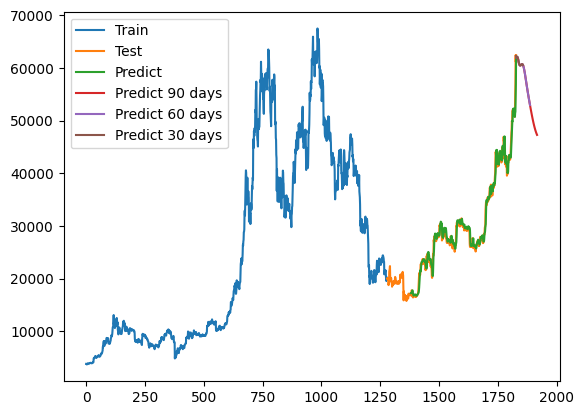

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [24]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 7s 155ms/step - loss: 0.0334 - val_loss: 0.0015
Epoch 2/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0036 - val_loss: 8.1589e-04
Epoch 4/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0034 - val_loss: 8.7279e-04
Epoch 5/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0029 - val_loss: 7.4086e-04
Epoch 6/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0027 - val_loss: 8.8992e-04
Epoch 7/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0026 - val_loss: 7.5200e-04
Epoch 8/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0025 - val_loss: 6.0369e-04
Epoch 9/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0023 - val_loss: 8.0364e-04
Epoch 10/100
19/19 [==============================] - 2s 110ms/

In [29]:
y_pred=model.predict(X_test)

14/14 [==============================] - 1s 23ms/step


In [30]:
y_pred=scaler.inverse_transform(y_pred)

In [31]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 1901.3971251069283


In [32]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

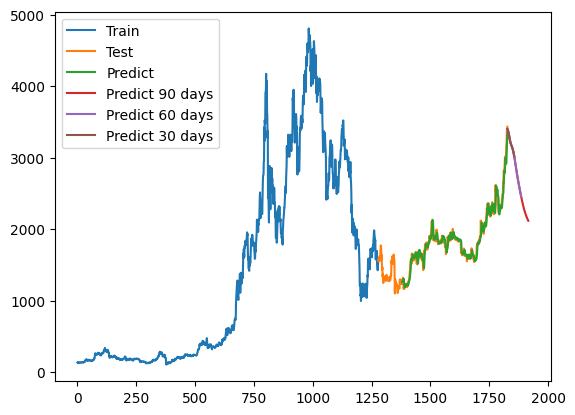

In [33]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [45]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [46]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [47]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [48]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [49]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [50]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [51]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 7s 151ms/step - loss: 0.0444 - val_loss: 0.0028
Epoch 2/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 3/100
19/19 [==============================] - 2s 106ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 4/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 5/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 6/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0035 - val_loss: 7.9242e-04
Epoch 7/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 8/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 9/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0027 - val_loss: 9.2734e-04
Epoch 10/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0026 

In [52]:
y_pred=model.predict(X_test)

14/14 [==============================] - 1s 22ms/step


In [53]:
y_pred=scaler.inverse_transform(y_pred)

In [54]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 286.6540953334131


In [55]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

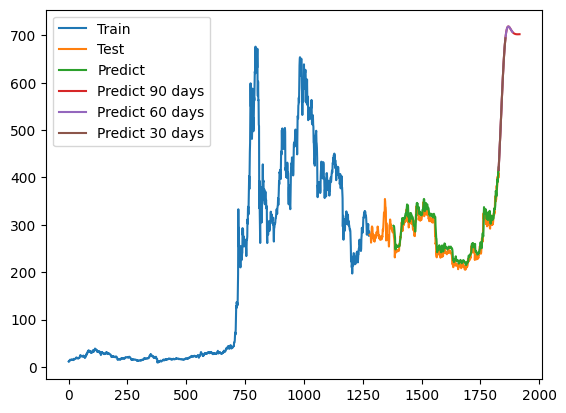

In [62]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [64]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [65]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [66]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [67]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [68]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [70]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 7s 139ms/step - loss: 0.0264 - val_loss: 0.0045
Epoch 2/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 3/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 4/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 5/100
22/22 [==============================] - 2s 105ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 6/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 7/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 8/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 9/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0023 - val_lo

In [72]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 21ms/step


In [73]:
y_pred=scaler.inverse_transform(y_pred)

In [74]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 36590.010706041154


In [76]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

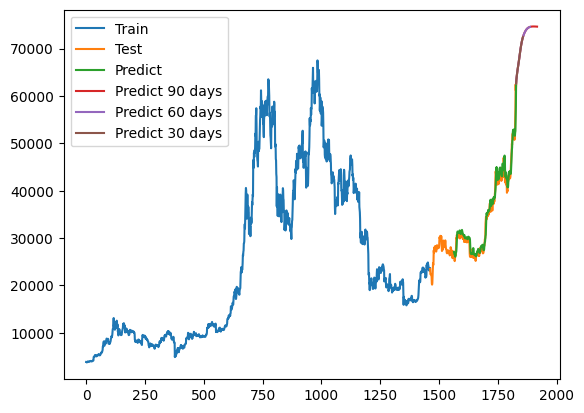

In [77]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [79]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [80]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [81]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [82]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [85]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [86]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 7s 141ms/step - loss: 0.0277 - val_loss: 0.0043
Epoch 2/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 3/100
22/22 [==============================] - 2s 105ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 4/100
22/22 [==============================] - 2s 104ms/step - loss: 0.0030 - val_loss: 9.8492e-04
Epoch 5/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0029 - val_loss: 9.3021e-04
Epoch 6/100
22/22 [==============================] - 2s 104ms/step - loss: 0.0027 - val_loss: 8.8085e-04
Epoch 7/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0026 - val_loss: 9.3416e-04
Epoch 8/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0024 - val_loss: 8.4567e-04
Epoch 9/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0023 - val_loss: 9.9193e-04
Epoch 10/100
22/22 [==============================] - 2s 104ms/step

In [87]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 20ms/step


In [88]:
y_pred=scaler.inverse_transform(y_pred)

In [89]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2049.908107102209


In [90]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

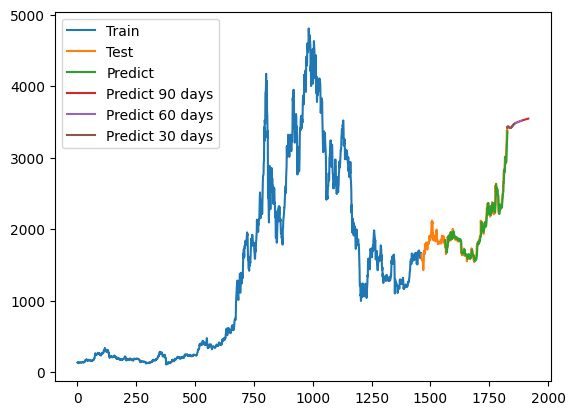

In [91]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [93]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [94]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [95]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [96]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [97]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [98]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [99]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 7s 142ms/step - loss: 0.0409 - val_loss: 0.0025
Epoch 2/100
22/22 [==============================] - 2s 104ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 3/100
22/22 [==============================] - 2s 106ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 4/100
22/22 [==============================] - 2s 106ms/step - loss: 0.0036 - val_loss: 9.0184e-04
Epoch 5/100
22/22 [==============================] - 2s 106ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 6/100
22/22 [==============================] - 2s 105ms/step - loss: 0.0030 - val_loss: 7.3125e-04
Epoch 7/100
22/22 [==============================] - 2s 105ms/step - loss: 0.0027 - val_loss: 9.9669e-04
Epoch 8/100
22/22 [==============================] - 2s 106ms/step - loss: 0.0028 - val_loss: 6.2060e-04
Epoch 9/100
22/22 [==============================] - 2s 107ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 10/100
22/22 [==============================] - 2s 103ms/step - loss:

In [101]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 20ms/step


In [102]:
y_pred=scaler.inverse_transform(y_pred)

In [103]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 259.5681192936758


In [104]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

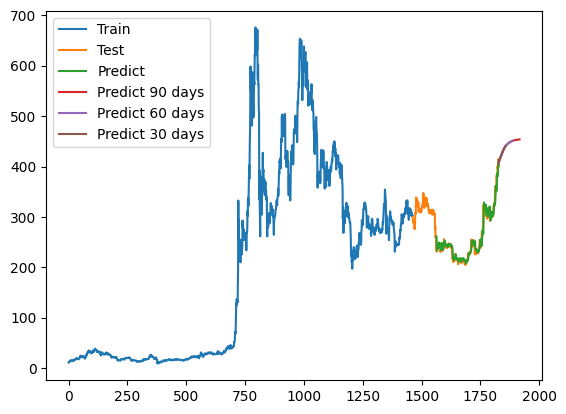

In [105]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [107]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [108]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [109]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [110]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [111]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [112]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [113]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [114]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 7s 130ms/step - loss: 0.0248 - val_loss: 0.0029
Epoch 2/100
25/25 [==============================] - 2s 97ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 3/100
25/25 [==============================] - 2s 98ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 4/100
25/25 [==============================] - 2s 99ms/step - loss: 0.0028 - val_loss: 0.0042
Epoch 5/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 6/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 7/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/100
25/25 [==============================] - 2s 97ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 10/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0021 - val_loss: 0.001

In [115]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 21ms/step


In [116]:
y_pred=scaler.inverse_transform(y_pred)

In [117]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 45150.08456127988


In [118]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

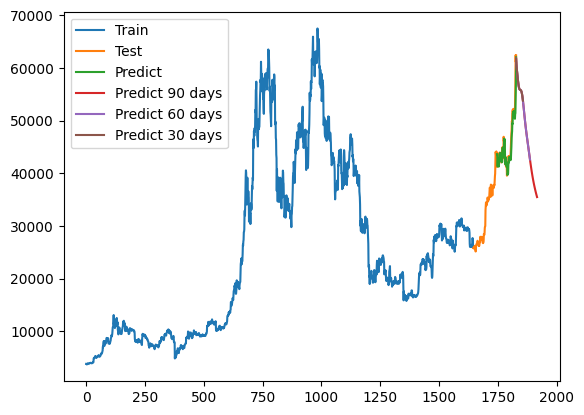

In [119]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 7s 141ms/step - loss: 0.0338 - val_loss: 0.0023
Epoch 2/100
25/25 [==============================] - 3s 104ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 3/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 4/100
25/25 [==============================] - 3s 107ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/100
25/25 [==============================] - 3s 109ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 6/100
25/25 [==============================] - 3s 111ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 7/100
25/25 [==============================] - 3s 114ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/100
25/25 [==============================] - 3s 110ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/100
25/25 [==============================] - 3s 105ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/100
25/25 [==============================] - 3s 104ms/step - loss: 0.0016 - val_lo

In [10]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 21ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2628.7382261451826


In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

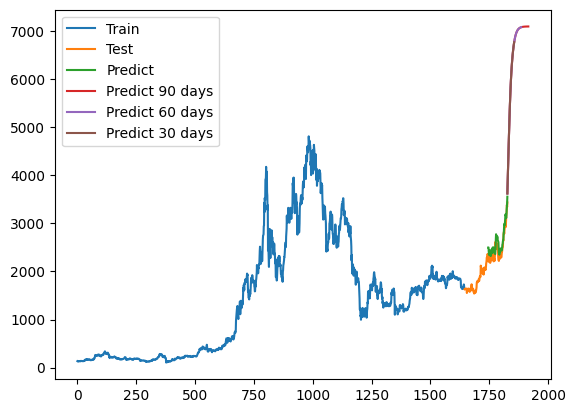

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [20]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [23]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 7s 133ms/step - loss: 0.0332 - val_loss: 0.0031
Epoch 2/100
25/25 [==============================] - 2s 99ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 3/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 5/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 6/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 7/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0025 - val_loss: 8.6765e-04
Epoch 8/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0026 - val_loss: 9.8752e-04
Epoch 9/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 10/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0022 - val_los

In [28]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 20ms/step


In [29]:
y_pred=scaler.inverse_transform(y_pred)

In [30]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 320.9180459001304


In [31]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

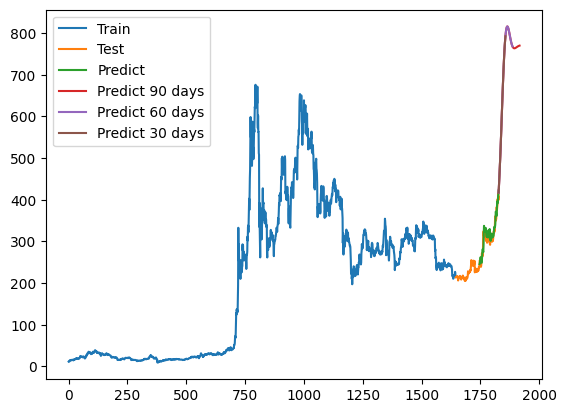

In [32]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()